In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek

In [2]:
df= pd.read_csv('bank.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [6]:
columns= ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
for i in columns:
    print('Column is:',i)
    print(df[df[i]== 'unknown'].count())
    print('\n')

Column is: age
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Column is: job
age          38
job          38
marital      38
education    38
default      38
balance      38
housing      38
loan         38
contact      38
day          38
month        38
duration     38
campaign     38
pdays        38
previous     38
poutcome     38
y            38
dtype: int64


Column is: marital
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Column is: education
age          187
job          187
marital      187
education    187
default      187
balance      187
h

In [7]:
3705/4521*100

81.95089581950896

In [8]:
# poutcome contain 82% unknown Records this can affect our model.
df.drop('poutcome',axis=1,inplace= True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,no


# Converting categorical into numeric

In [9]:
columns=['default','housing','loan','y']
for i in columns:
    df[i]= df[i].map({'no':0,'yes':1})
    print(df[i].unique())

[0 1]
[0 1]
[0 1]
[0 1]


In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,0


In [11]:
df.contact.unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [12]:
df.month= df['month'].map({'oct':10, 'may':5, 'apr':4, 'jun':6, 'feb':2, 'aug':8, 'jan':1, 'jul':7, 'nov':11,'sep':9, 'mar':3, 'dec':12})
df.marital= df['marital'].map({'married':1, 'single':0, 'divorced':2})
df.education= df['education'].map({'primary':1, 'secondary':2, 'tertiary':3, 'unknown':0})
df.contact= df['contact'].map({'cellular':1, 'unknown':0, 'telephone':2})


In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,1,1,0,1787,0,0,1,19,10,79,1,-1,0,0
1,33,services,1,2,0,4789,1,1,1,11,5,220,1,339,4,0
2,35,management,0,3,0,1350,1,0,1,16,4,185,1,330,1,0
3,30,management,1,3,0,1476,1,1,0,3,6,199,4,-1,0,0
4,59,blue-collar,1,2,0,0,1,0,0,5,5,226,1,-1,0,0


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label= LabelEncoder()
df.job= label.fit_transform(df.job)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,10,1,1,0,1787,0,0,1,19,10,79,1,-1,0,0
1,33,7,1,2,0,4789,1,1,1,11,5,220,1,339,4,0
2,35,4,0,3,0,1350,1,0,1,16,4,185,1,330,1,0
3,30,4,1,3,0,1476,1,1,0,3,6,199,4,-1,0,0
4,59,1,1,2,0,0,1,0,0,5,5,226,1,-1,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int32
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  y          4521 non-null   int64
dtypes: int32(1), int64(15)
memory usage: 547.6 KB


# Checking & Processing Imabalance dataset

In [17]:
df.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [18]:
x= df.drop(['y','duration'],axis=1)
y= df.y

In [19]:
smt= SMOTETomek()
x_ne,y_ne= smt.fit_resample(x,y)
y_ne.value_counts()

0    3798
1    3798
Name: y, dtype: int64

In [20]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous
0,30,10,1,1,0,1787,0,0,1,19,10,1,-1,0
1,33,7,1,2,0,4789,1,1,1,11,5,1,339,4
2,35,4,0,3,0,1350,1,0,1,16,4,1,330,1
3,30,4,1,3,0,1476,1,1,0,3,6,4,-1,0
4,59,1,1,2,0,0,1,0,0,5,5,1,-1,0


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

# feature selection

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf=RandomForestClassifier()
feature=rf.fit(x_ne,y_ne)
imp= feature.feature_importances_
imp

array([0.10515757, 0.09481962, 0.04438555, 0.04819983, 0.002038  ,
       0.15609758, 0.1146185 , 0.04156782, 0.03146619, 0.11194266,
       0.0935043 , 0.0579489 , 0.06263372, 0.03561978])

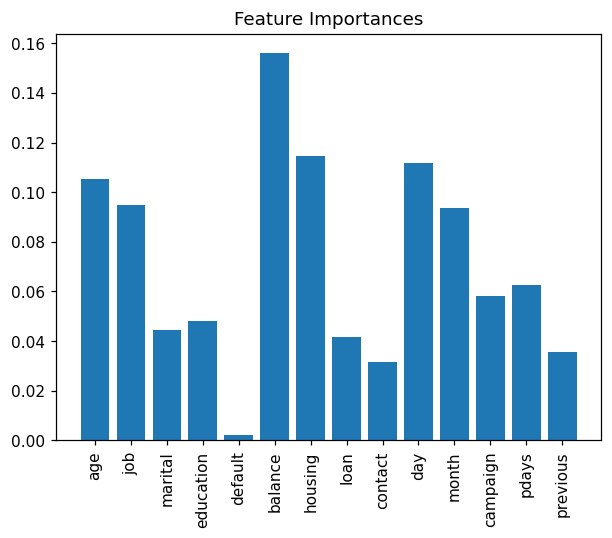

In [25]:
plt.figure(dpi=110)
plt.bar(x= x_ne.columns, height = imp)
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

In [26]:
# Lets drop the default column
X= x_ne.drop('default',axis=1)
Y= y_ne

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

In [28]:
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,random_state=10)

In [29]:
xtrain.shape

(6076, 13)

In [30]:
xtest.shape

(1520, 13)

In [31]:
ytest.shape

(1520,)

In [32]:
scale= StandardScaler()
xtrain_scale= scale.fit_transform(xtrain)
xtest_scale= scale.transform(xtest)

In [50]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# 1.Logistic Regression

In [46]:
LR= LogisticRegression()

# Without Tuning of Params

In [47]:
LR.fit(xtrain_scale,ytrain)
ytrain_pred= LR.predict(xtrain_scale)
ytest_pred= LR.predict(xtest_scale)

In [48]:
print(classification_report(ytrain,ytrain_pred))
print(confusion_matrix(ytrain,ytrain_pred),'\n')
cvs = cross_val_score(rf,xtrain_scale,ytrain,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      3016
           1       0.72      0.77      0.74      3060

    accuracy                           0.73      6076
   macro avg       0.73      0.73      0.73      6076
weighted avg       0.73      0.73      0.73      6076

[[2079  937]
 [ 694 2366]] 

Cross_val_score: 0.8925287761206973


model 2 AUC score: 0.7312631109030703


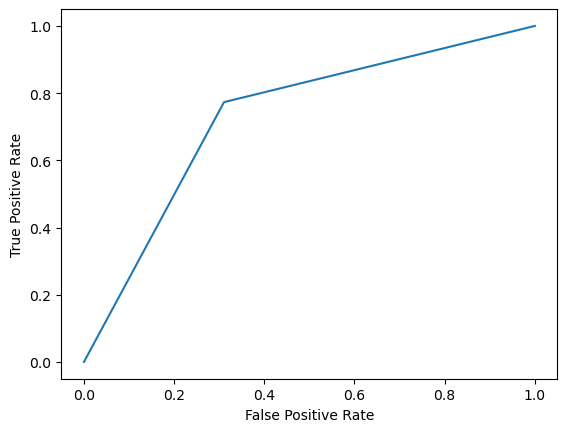

In [51]:
plot_roc_curve(ytrain,ytrain_pred)
print(f'model 2 AUC score: {roc_auc_score(ytrain, ytrain_pred)}')

In [52]:
print(classification_report(ytest,ytest_pred))
print(confusion_matrix(ytest,ytest_pred),'\n')
cvs = cross_val_score(rf,xtest_scale,ytest,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       782
           1       0.71      0.79      0.75       738

    accuracy                           0.74      1520
   macro avg       0.74      0.74      0.74      1520
weighted avg       0.75      0.74      0.74      1520

[[549 233]
 [158 580]] 

Cross_val_score: 0.832236842105263


model 2 AUC score: 0.7439769474421087


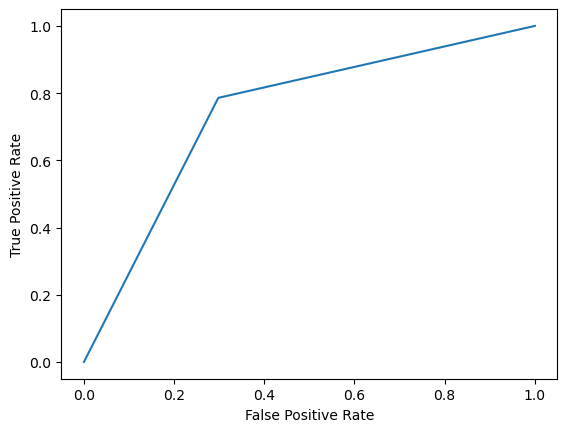

In [53]:
plot_roc_curve(ytest,ytest_pred)
print(f'model 2 AUC score: {roc_auc_score(ytest, ytest_pred)}')

# With Tuning Params

In [106]:
params = {}
params['penalty'] = ['l1', 'l2', 'elasticnet']
params['solver'] = ['lbfgs','liblinear']
params['max_iter']=[1000,5000,10000]
params['random_state']= [7,10,100]

In [107]:
model = GridSearchCV(LR,param_grid=params,cv=5,scoring='f1',verbose=3)

In [108]:
model.fit(xtrain_scale,ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_iter=1000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=l1, random_state=7, solver=liblinear;, score=0.738 total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=l1, random_state=7, solver=liblinear;, score=0.742 total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=l1, random_state=7, solver=liblinear;, score=0.741 total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l1, random_state=7, solver=liblinear;, score=0.746 total time=   0.0s
[CV 5/5] END m

[CV 3/5] END max_iter=1000, penalty=elasticnet, random_state=100, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=elasticnet, random_state=100, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=elasticnet, random_state=100, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END max_iter=5000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=5000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=5000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=5000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END max_iter=5000, penalty=l1, random_state=7, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END max_iter=5000, penalty=l1, random_state=7, solver=liblinear;, score=0.738 total time=   0.0s
[CV 2/5] END max_iter=5000, penalty=l1, random_state

[CV 1/5] END max_iter=10000, penalty=l2, random_state=7, solver=lbfgs;, score=0.737 total time=   0.0s
[CV 2/5] END max_iter=10000, penalty=l2, random_state=7, solver=lbfgs;, score=0.742 total time=   0.0s
[CV 3/5] END max_iter=10000, penalty=l2, random_state=7, solver=lbfgs;, score=0.741 total time=   0.0s
[CV 4/5] END max_iter=10000, penalty=l2, random_state=7, solver=lbfgs;, score=0.745 total time=   0.0s
[CV 5/5] END max_iter=10000, penalty=l2, random_state=7, solver=lbfgs;, score=0.755 total time=   0.0s
[CV 1/5] END max_iter=10000, penalty=l2, random_state=7, solver=liblinear;, score=0.737 total time=   0.0s
[CV 2/5] END max_iter=10000, penalty=l2, random_state=7, solver=liblinear;, score=0.742 total time=   0.0s
[CV 3/5] END max_iter=10000, penalty=l2, random_state=7, solver=liblinear;, score=0.741 total time=   0.0s
[CV 4/5] END max_iter=10000, penalty=l2, random_state=7, solver=liblinear;, score=0.745 total time=   0.0s
[CV 5/5] END max_iter=10000, penalty=l2, random_state=7, 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [1000, 5000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [7, 10, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1', verbose=3)

In [109]:
model= model.best_estimator_
model

LogisticRegression(max_iter=1000, penalty='l1', random_state=7,
                   solver='liblinear')

In [110]:
ytrain_pred1= model.predict(xtrain_scale)
ytest_pred1= model.predict(xtest_scale)

In [111]:
print(classification_report(ytrain,ytrain_pred1))
print(confusion_matrix(ytrain,ytrain_pred1),'\n')
cvs = cross_val_score(model,xtrain_scale,ytrain,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      3033
           1       0.71      0.77      0.74      3031

    accuracy                           0.73      6064
   macro avg       0.73      0.73      0.73      6064
weighted avg       0.73      0.73      0.73      6064

[[2096  937]
 [ 682 2349]] 

Cross_val_score: 0.7335113989158388


In [112]:
print(classification_report(ytest,ytest_pred1))
print(confusion_matrix(ytest,ytest_pred1),'\n')
cvs = cross_val_score(model,xtest_scale,ytest,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.74      0.67      0.71       757
           1       0.70      0.77      0.73       759

    accuracy                           0.72      1516
   macro avg       0.72      0.72      0.72      1516
weighted avg       0.72      0.72      0.72      1516

[[508 249]
 [174 585]] 

Cross_val_score: 0.7176368072499129


# 2.Gradient Boosting

In [33]:
gb= GradientBoostingClassifier()

In [34]:
gb.fit(xtrain_scale,ytrain)

GradientBoostingClassifier()

In [43]:
imp1=gb.feature_importances_
imp1=np.sort(imp1)
imp1

array([0.00774563, 0.02640934, 0.04188702, 0.04451309, 0.04642054,
       0.0524825 , 0.0606694 , 0.0753947 , 0.07976612, 0.10011235,
       0.10232052, 0.1204285 , 0.2418503 ])

In [44]:
columns=['previous','age','contact','day','campaign','marital','education','balance','loan','job','month','pdays','housing']

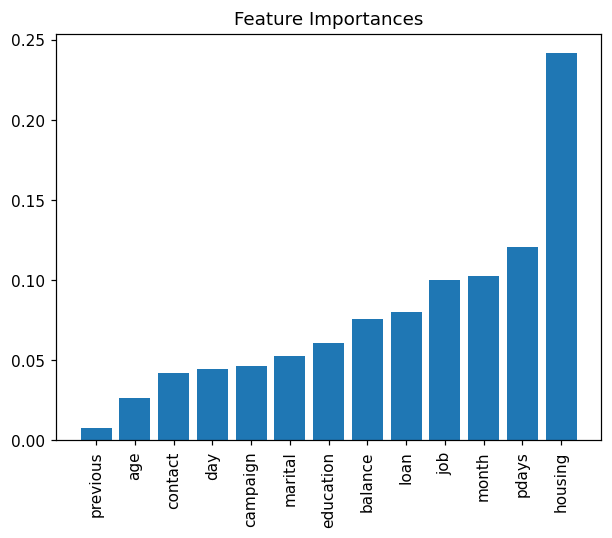

In [45]:
plt.figure(dpi=110)
plt.bar(x=columns, height =imp1)
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()

# Without Tuning params

In [80]:
ytrain_pred =gb.predict(xtrain_scale)
ytest_pred= gb.predict(xtest_scale)

In [113]:
print(classification_report(ytrain,ytrain_pred))
print(confusion_matrix(ytrain,ytrain_pred),'\n')
cvs = cross_val_score(gb,xtrain_scale,ytrain,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3033
           1       0.84      0.85      0.85      3031

    accuracy                           0.85      6064
   macro avg       0.85      0.85      0.85      6064
weighted avg       0.85      0.85      0.85      6064

[[2558  475]
 [ 459 2572]] 

Cross_val_score: 0.8260231294958162


In [114]:
print(classification_report(ytest,ytest_pred))
print(confusion_matrix(ytest,ytest_pred),'\n')
cvs = cross_val_score(gb,xtest_scale,ytest,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       757
           1       0.84      0.82      0.83       759

    accuracy                           0.83      1516
   macro avg       0.83      0.83      0.83      1516
weighted avg       0.83      0.83      0.83      1516

[[638 119]
 [140 619]] 

Cross_val_score: 0.8159506796793308


# With Tuning Params

In [89]:
params1={}
params1['loss'] = ['exponential']
params1['learning_rate'] = [0.001]
params1['n_estimators']=[3000,5000,7500,10000]
params1['max_depth']= [3,5,6]

In [90]:
model1=GridSearchCV(gb,param_grid= params1,cv=5,scoring='f1',verbose=3)

In [91]:
model1.fit(xtrain_scale,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=3000;, score=0.790 total time=  14.3s
[CV 2/5] END learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=3000;, score=0.801 total time=  13.5s
[CV 3/5] END learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=3000;, score=0.781 total time=  12.9s
[CV 4/5] END learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=3000;, score=0.786 total time=  12.7s
[CV 5/5] END learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=3000;, score=0.803 total time=  12.7s
[CV 1/5] END learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=5000;, score=0.807 total time=  21.2s
[CV 2/5] END learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=5000;, score=0.802 total time=  21.0s
[CV 3/5] END learning_rate=0.001, loss=exponential, max_depth=3, n_estimators=5000;, score=0.792 total time=  21.1s
[CV 4/5] EN

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001], 'loss': ['exponential'],
                         'max_depth': [3, 5, 6],
                         'n_estimators': [3000, 5000, 7500, 10000]},
             scoring='f1', verbose=3)

In [92]:
model1=model1.best_estimator_
model1

GradientBoostingClassifier(learning_rate=0.001, loss='exponential', max_depth=6,
                           n_estimators=10000)

In [94]:
ytrain_pred2=model1.predict(xtrain_scale)
ytest_pred2= model1.predict(xtest_scale)

In [115]:
print(classification_report(ytrain,ytrain_pred2))
print(confusion_matrix(ytrain,ytrain_pred2),'\n')
cvs = cross_val_score(model1,xtrain_scale,ytrain,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3033
           1       0.94      0.95      0.95      3031

    accuracy                           0.95      6064
   macro avg       0.95      0.95      0.95      6064
weighted avg       0.95      0.95      0.95      6064

[[2860  173]
 [ 152 2879]] 

Cross_val_score: 0.8769795183801742


model 2 AUC score: 0.946406149533184


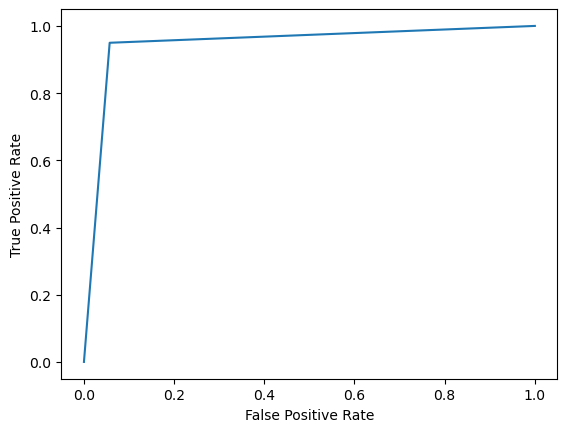

In [163]:
plot_roc_curve(ytrain,ytrain_pred2)
print(f'model 2 AUC score: {roc_auc_score(ytrain, ytrain_pred2)}')

In [116]:
print(classification_report(ytest,ytest_pred2))
print(confusion_matrix(ytest,ytest_pred2),'\n')
cvs = cross_val_score(model1,xtest_scale,ytest,cv=5)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       757
           1       0.89      0.88      0.88       759

    accuracy                           0.88      1516
   macro avg       0.88      0.88      0.88      1516
weighted avg       0.88      0.88      0.88      1516

[[672  85]
 [ 91 668]] 

Cross_val_score: 0.8377352736144997


model 2 AUC score: 0.8839100324942608


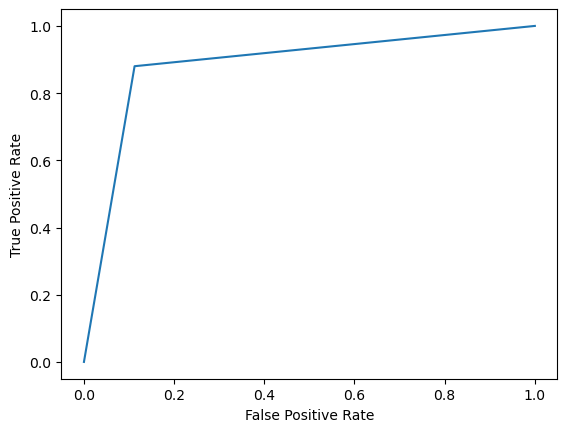

In [164]:
plot_roc_curve(ytest,ytest_pred2)
print(f'model 2 AUC score: {roc_auc_score(ytest, ytest_pred2)}')

# 3.Random Forest

In [133]:
rf=RandomForestClassifier()

# Without Tuning of Params 

In [134]:
rf.fit(xtrain_scale,ytrain)
ytrain_pred = rf.predict(xtrain_scale)
ytest_pred= rf.predict(xtest_scale)

In [135]:
print(classification_report(ytrain,ytrain_pred))
print(confusion_matrix(ytrain,ytrain_pred),'\n')
cvs = cross_val_score(rf,xtrain_scale,ytrain,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3033
           1       1.00      1.00      1.00      3031

    accuracy                           1.00      6064
   macro avg       1.00      1.00      1.00      6064
weighted avg       1.00      1.00      1.00      6064

[[3033    0]
 [   0 3031]] 

Cross_val_score: 0.8865428635120514


In [146]:
print(classification_report(ytest,ytest_pred))
print(confusion_matrix(ytest,ytest_pred),'\n')
cvs = cross_val_score(rf,xtest_scale,ytest,cv=5)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       757
           1       0.89      0.90      0.90       759

    accuracy                           0.90      1516
   macro avg       0.90      0.90      0.90      1516
weighted avg       0.90      0.90      0.90      1516

[[672  85]
 [ 73 686]] 

Cross_val_score: 0.8265025186729199


# With Tuning of Params

In [148]:
params2 = {}
params2['criterion'] = ['gini','entropy']
params2['max_depth'] = [10,12,15]
params2['n_estimators']= [400,800,1000]
params2['max_features']=['sqrt', 'log2']

In [149]:
model2=GridSearchCV(rf,param_grid= params2,cv=5,scoring='f1',verbose=3,)

In [150]:
model2.fit(xtrain_scale,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400;, score=0.840 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400;, score=0.836 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400;, score=0.839 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400;, score=0.835 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400;, score=0.857 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=800;, score=0.841 total time=   3.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=800;, score=0.833 total time=   3.5s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=800;, score=0.843 total time=   2.7s
[CV 4/5] END criterion=gini, max_depth=10,

[CV 4/5] END criterion=gini, max_depth=15, max_features=sqrt, n_estimators=1000;, score=0.877 total time=   4.7s
[CV 5/5] END criterion=gini, max_depth=15, max_features=sqrt, n_estimators=1000;, score=0.883 total time=   4.3s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, n_estimators=400;, score=0.875 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, n_estimators=400;, score=0.872 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=15, max_features=log2, n_estimators=400;, score=0.870 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=15, max_features=log2, n_estimators=400;, score=0.880 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=15, max_features=log2, n_estimators=400;, score=0.883 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=15, max_features=log2, n_estimators=800;, score=0.878 total time=   3.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=log2, n_estimators=800;, score=0.871 total tim

[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=1000;, score=0.859 total time=   3.8s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=1000;, score=0.848 total time=   3.8s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=1000;, score=0.850 total time=   3.9s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=1000;, score=0.853 total time=   3.9s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=1000;, score=0.866 total time=   3.8s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, n_estimators=400;, score=0.875 total time=   1.6s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, n_estimators=400;, score=0.872 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, n_estimators=400;, score=0.862 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, n_estimato

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [400, 800, 1000]},
             scoring='f1', verbose=3)

In [151]:
model2= model2.best_estimator_
model2

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=1000)

In [152]:
ytrain_pred3 = model2.predict(xtrain_scale)
ytest_pred3 = model2.predict(xtest_scale)

In [153]:
print(classification_report(ytrain,ytrain_pred3))
print(confusion_matrix(ytrain,ytrain_pred3),'\n')
cvs = cross_val_score(model2,xtrain_scale,ytrain,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3033
           1       0.97      0.98      0.98      3031

    accuracy                           0.98      6064
   macro avg       0.98      0.98      0.98      6064
weighted avg       0.98      0.98      0.98      6064

[[2937   96]
 [  47 2984]] 

Cross_val_score: 0.880608793993073


In [155]:
print(classification_report(ytest,ytest_pred3))
print(confusion_matrix(ytest,ytest_pred3),'\n')
cvs = cross_val_score(model2,xtest_scale,ytest,cv=10)
print('Cross_val_score:',np.mean(cvs))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       757
           1       0.88      0.89      0.89       759

    accuracy                           0.88      1516
   macro avg       0.88      0.88      0.88      1516
weighted avg       0.88      0.88      0.88      1516

[[662  95]
 [ 81 678]] 

Cross_val_score: 0.8344283722551411


model 2 AUC score: 0.9764208683041475


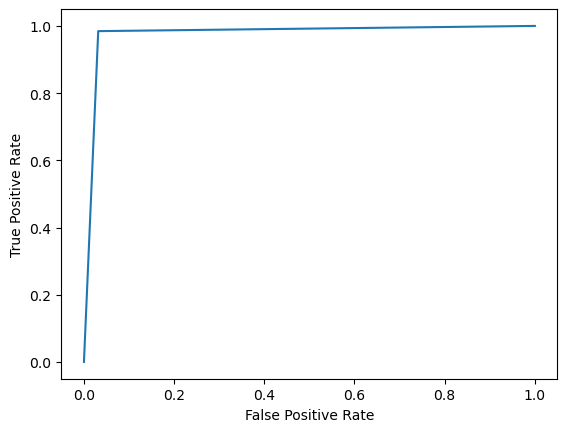

In [161]:
plot_roc_curve(ytrain,ytrain_pred3)
print(f'model 2 AUC score: {roc_auc_score(ytrain, ytrain_pred3)}')

model 2 AUC score: 0.8838926279624688


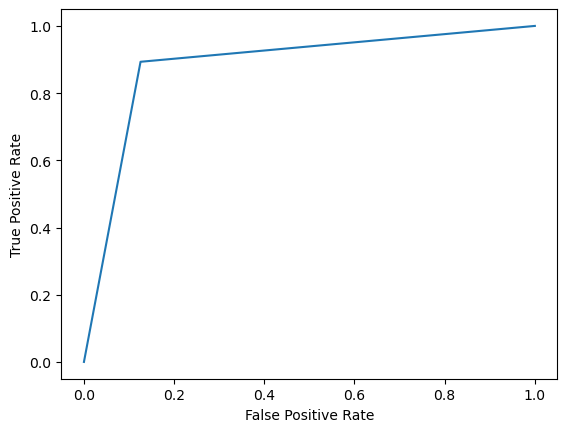

In [162]:
plot_roc_curve(ytest,ytest_pred3)
print(f'model 2 AUC score: {roc_auc_score(ytest, ytest_pred3)}')